In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/cod/Desktop/train.csv')
df_test = pd.read_csv('C:/Users/cod/Desktop/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.drop(['PassengerId','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [6]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [7]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [8]:
df_train.Survived.isnull().any()

False

In [9]:
df_train.Pclass.isnull().any()

False

In [10]:
df_train.Name.isnull().any()

False

In [11]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
for col in df_train.columns:
    msg='column : {:<10} Nan : {:.2f}%'.format(col,
                        100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : Survived   Nan : 0.00%
column : Pclass     Nan : 0.00%
column : Name       Nan : 0.00%
column : Sex        Nan : 0.00%
column : Age        Nan : 19.87%
column : SibSp      Nan : 0.00%
column : Parch      Nan : 0.00%
column : Fare       Nan : 0.00%
column : Cabin      Nan : 77.10%
column : Embarked   Nan : 0.22%


In [14]:
for col in df_test.columns:
    msg='column : {:<10} Nan : {:.2f}%'.format(col,
                                100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : Pclass     Nan : 0.00%
column : Name       Nan : 0.00%
column : Sex        Nan : 0.00%
column : Age        Nan : 20.57%
column : SibSp      Nan : 0.00%
column : Parch      Nan : 0.00%
column : Fare       Nan : 0.24%
column : Cabin      Nan : 78.23%
column : Embarked   Nan : 0.00%


In [15]:
for col in df_test.columns:
    print('{},{}'.format(col,df_test[col].shape[0]))

df_test['Pclass'].shape[0]
df_test.Pclass.shape[0]

Pclass,418
Name,418
Sex,418
Age,418
SibSp,418
Parch,418
Fare,418
Cabin,418
Embarked,418


418

In [16]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


In [17]:
df_train.loc[df_train['Age'].isnull(),'Age']=round(df_train.Age.mean(),1)

In [18]:
df_train.loc[(df_train['Age']==1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
164,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,39.6875,NaN,S
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,11.1333,NaN,S
183,1,2,"Becker, Master. Richard F",male,1.0,2,1,39.0000,F4,S
381,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,15.7417,NaN,C
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,46.9000,NaN,S
788,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,20.5750,NaN,S
827,1,2,"Mallet, Master. Andre",male,1.0,0,2,37.0042,NaN,C


<AxesSubplot:>

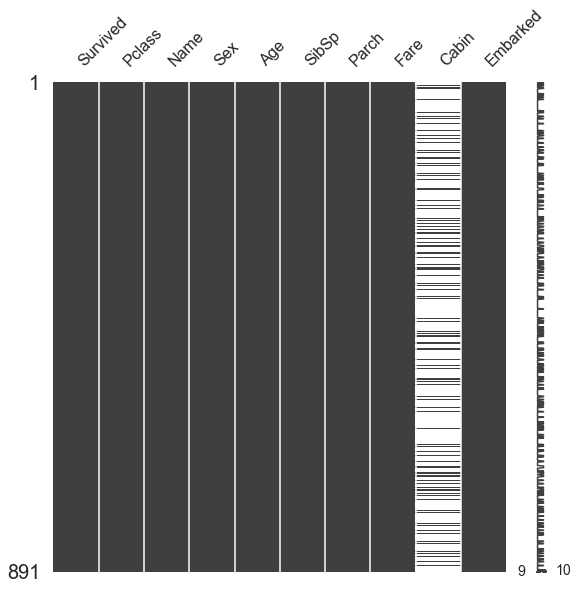

In [19]:
msno.matrix(df=df_train.iloc[:,:],figsize=(9,9))

In [20]:
df_test.loc[df_test['Age'].isnull(),'Age']=round(df_test.Age.mean(),1)

<AxesSubplot:>

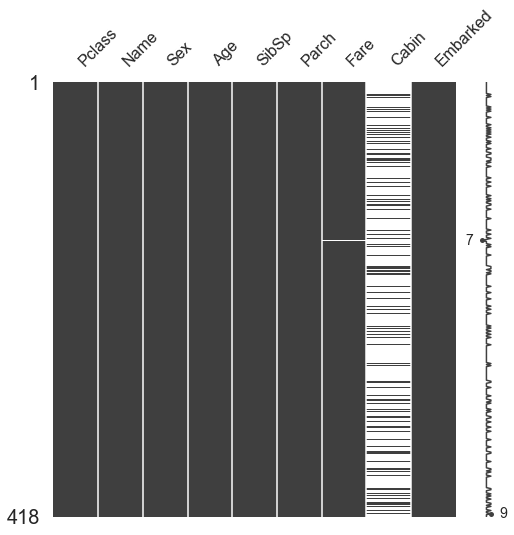

In [21]:
msno.matrix(df_test,figsize=(8,8))

In [22]:
df_test.loc[df_test.Fare.isnull()]=df_test.Fare.mean()

<AxesSubplot:>

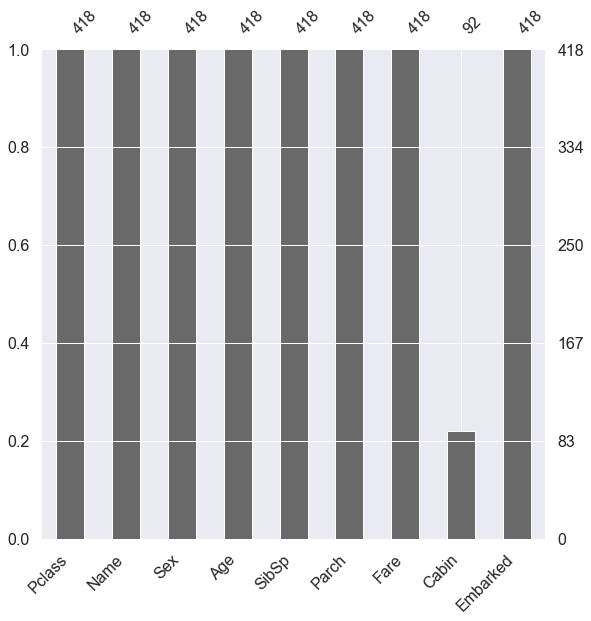

In [23]:
msno.bar(df_test,figsize=(9,9))

<AxesSubplot:>

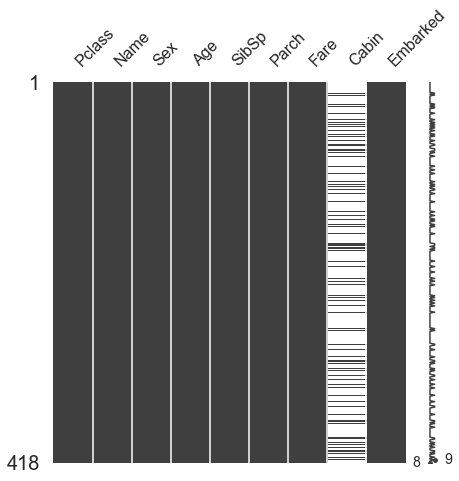

In [24]:
msno.matrix(df_test,figsize=(7,7))

In [25]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

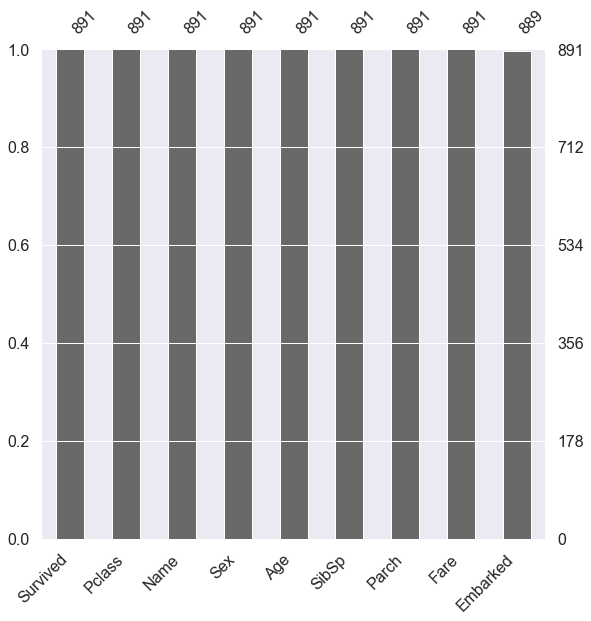

In [26]:
msno.bar(df_train,figsize=(9,9))

<AxesSubplot:>

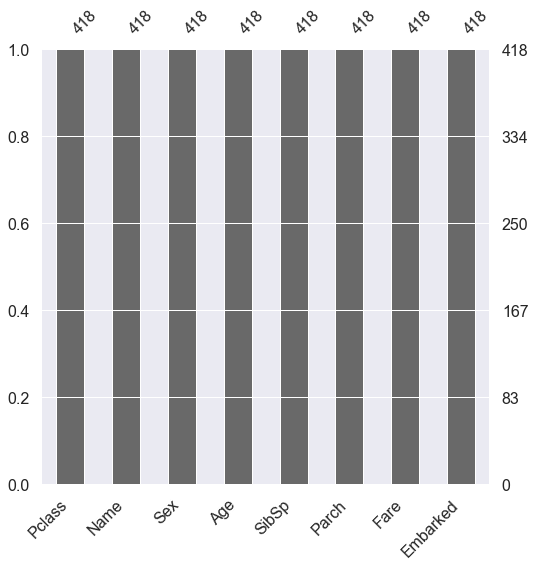

In [27]:
msno.bar(df_test,figsize=(8,8))

In [28]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [29]:
df_train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [30]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')

In [31]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [32]:
df_test['Initial']=df_test.Name.str.extract('([A-Za-z])\.')

In [33]:
df_test.Initial.head()

0    r
1    s
2    r
3    r
4    s
Name: Initial, dtype: object

In [34]:
x=pd.DataFrame({'cat':['cat','caat']})

In [35]:
df_test.Initial.unique()

array(['r', 's', 'l', 'v', nan, 'a'], dtype=object)

In [36]:
df_test.Initial.describe()

count     417
unique      5
top         r
freq      261
Name: Initial, dtype: object

In [37]:
pd.crosstab(df_train['Initial'],df_train['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [38]:
df_train.Initial[df_train['Sex']=='male']

0          Mr
4          Mr
5          Mr
6          Mr
7      Master
        ...  
883        Mr
884        Mr
886       Rev
889        Mr
890        Mr
Name: Initial, Length: 577, dtype: object

In [39]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [40]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,29.7,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


<AxesSubplot:>

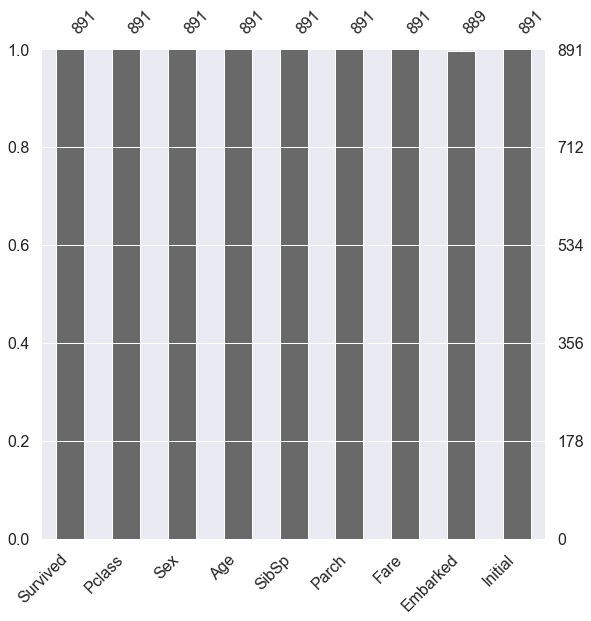

In [41]:
msno.bar(df_train,figsize=(9,9))

In [42]:
100*(df_train.Initial.isnull().sum()/df_train.Initial.shape[0])

0.0

In [43]:
df_train.Initial.describe()

count     891
unique     17
top        Mr
freq      517
Name: Initial, dtype: object

In [44]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df_train.drop('Initial',axis=1,inplace=True)
df_test.drop('Initial',axis=1,inplace=True)

In [46]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,34.5,0.0,0.0,7.8292,Q
1,3.0,female,47.0,1.0,0.0,7.0000,S
2,2.0,male,62.0,0.0,0.0,9.6875,Q
3,3.0,male,27.0,0.0,0.0,8.6625,S
4,3.0,female,22.0,1.0,1.0,12.2875,S


<AxesSubplot:xlabel='Pclass'>

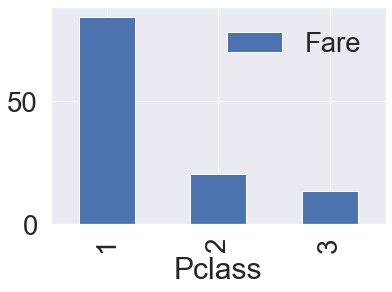

In [48]:
df_train[['Pclass','Fare']].groupby(['Pclass']).mean().plot.bar()

In [49]:
pd.crosstab(df_train['Pclass'],df_train['Fare'],margins=True)

Fare,0.0,4.0125,5.0,6.2375,6.4375,6.45,6.4958,6.75,6.8583,6.95,...,164.8667,211.3375,211.5,221.7792,227.525,247.5208,262.375,263.0,512.3292,All
Pclass,,,,,,,,,,,,,,,,,,,,,
1,5,0,1,0,0,0,0,0,0,0,...,2,3,1,1,4,2,2,4,3,216
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,184
3,4,1,0,1,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,491
All,15,1,1,1,1,1,2,2,1,1,...,2,3,1,1,4,2,2,4,3,891


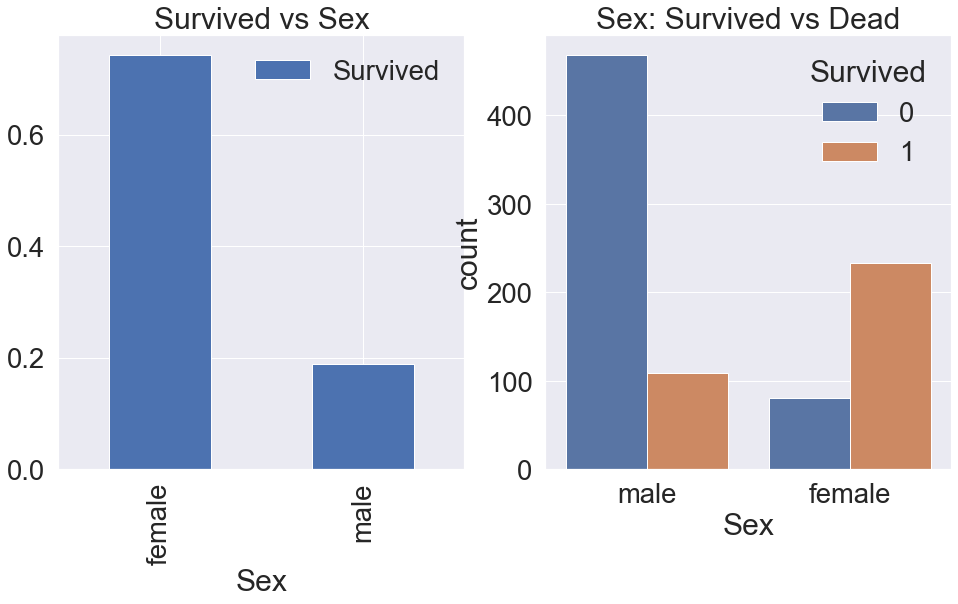

In [50]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

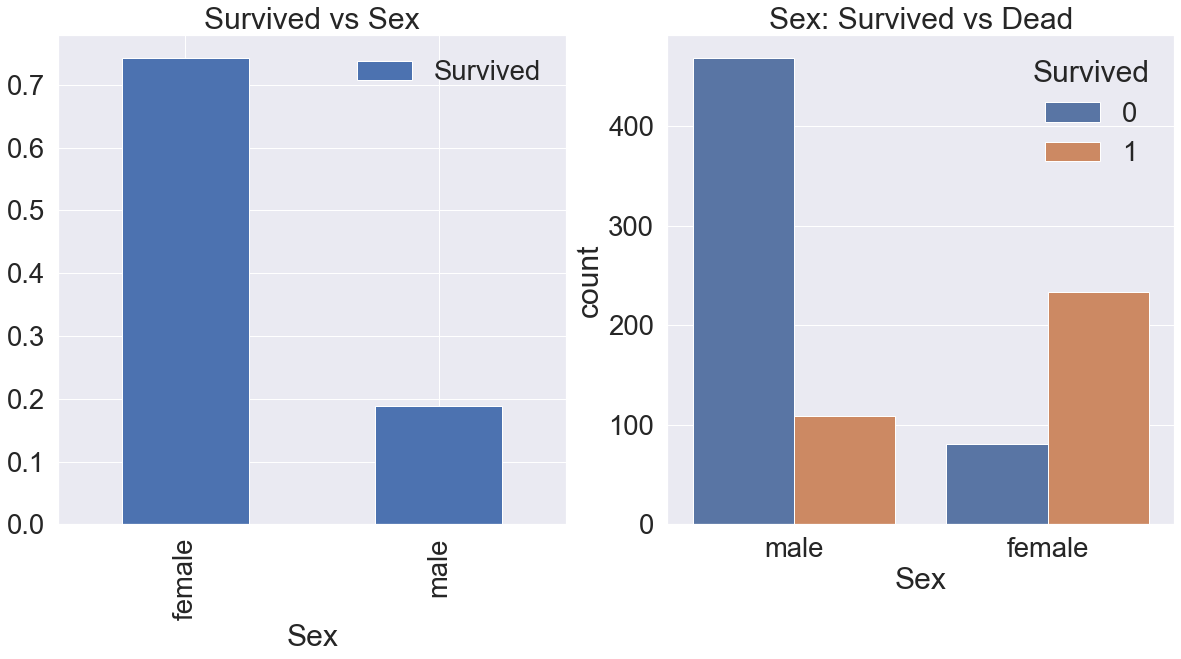

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,9))

df_train[['Sex','Survived']].groupby(['Sex'],
                            as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

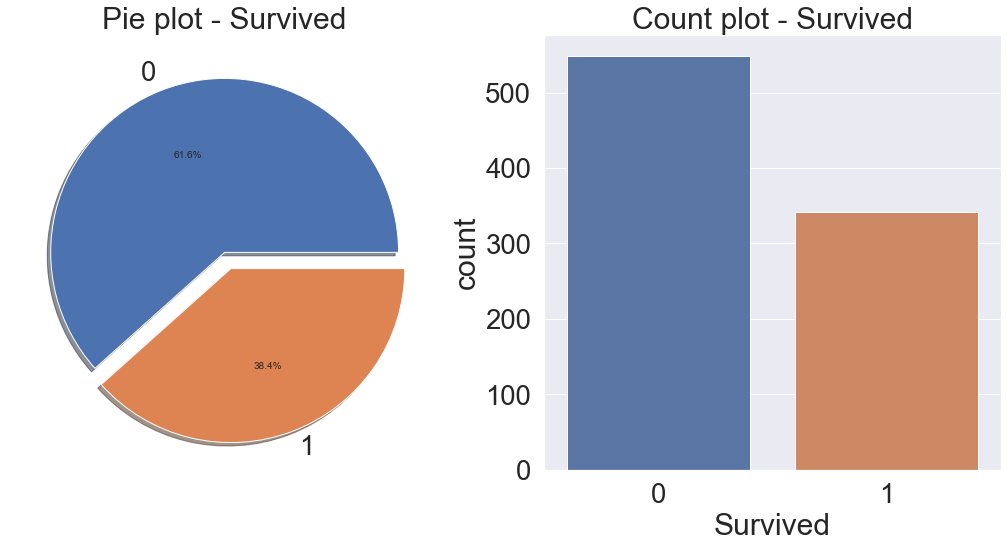

In [60]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.1f%%',
                                                ax=ax[0],shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

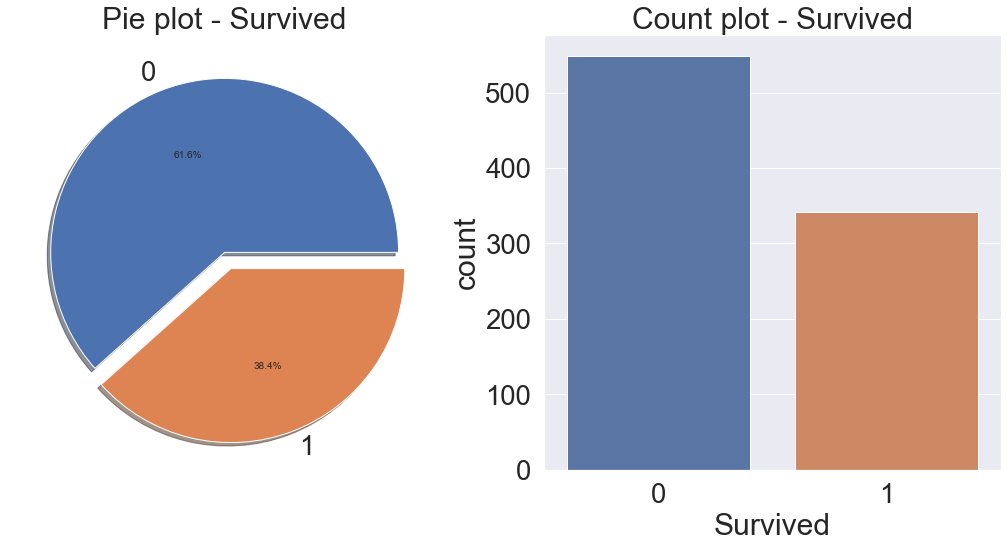

In [69]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                                autopct='%1.1f%%',
                                                ax=ax[0],shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

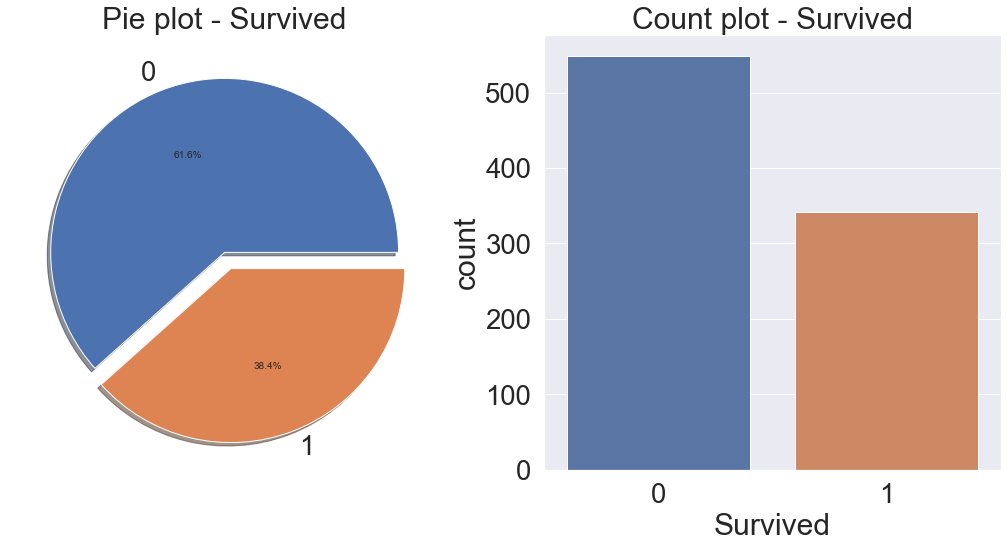

In [72]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                    autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

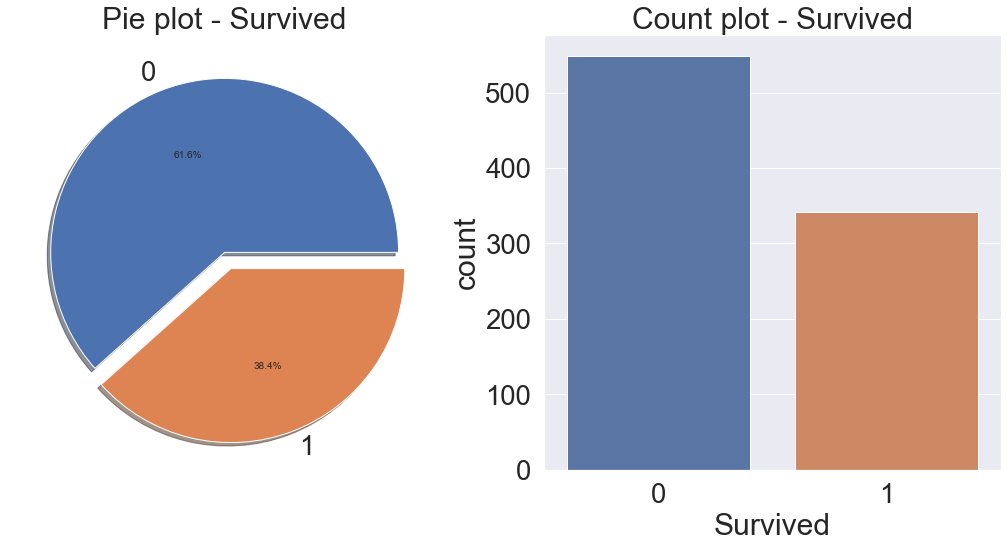

In [78]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                    autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

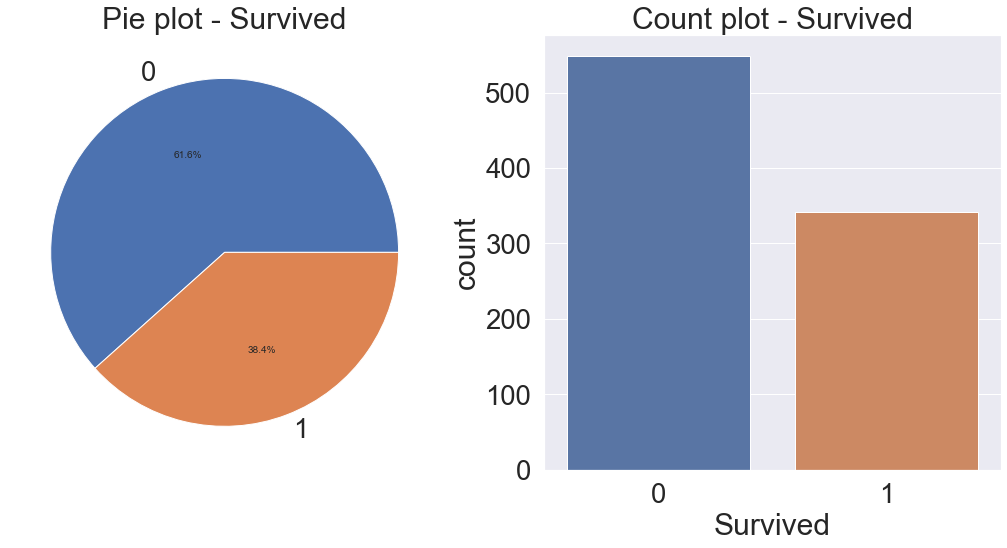

In [79]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [80]:
pd.crosstab(df_train['Survived'],df_train['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Pclass'>

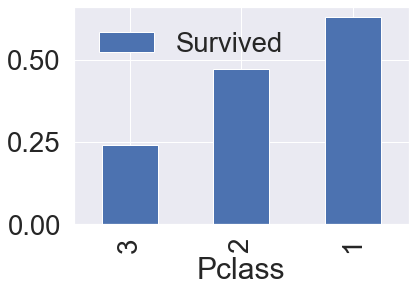

In [85]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(
                                                by='Survived').plot.bar()

In [81]:
pd.crosstab(df_train['Survived'],df_train['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


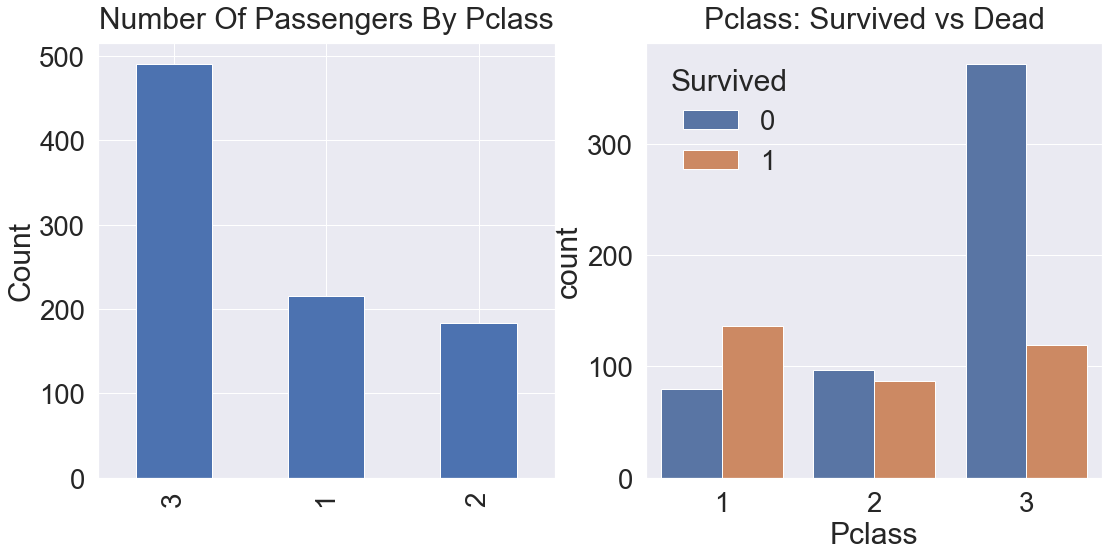

In [89]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title('Number Of Passengers By Pclass', y=1.02)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])

ax[1].set_title('Pclass: Survived vs Dead',y=1.02)

plt.show()

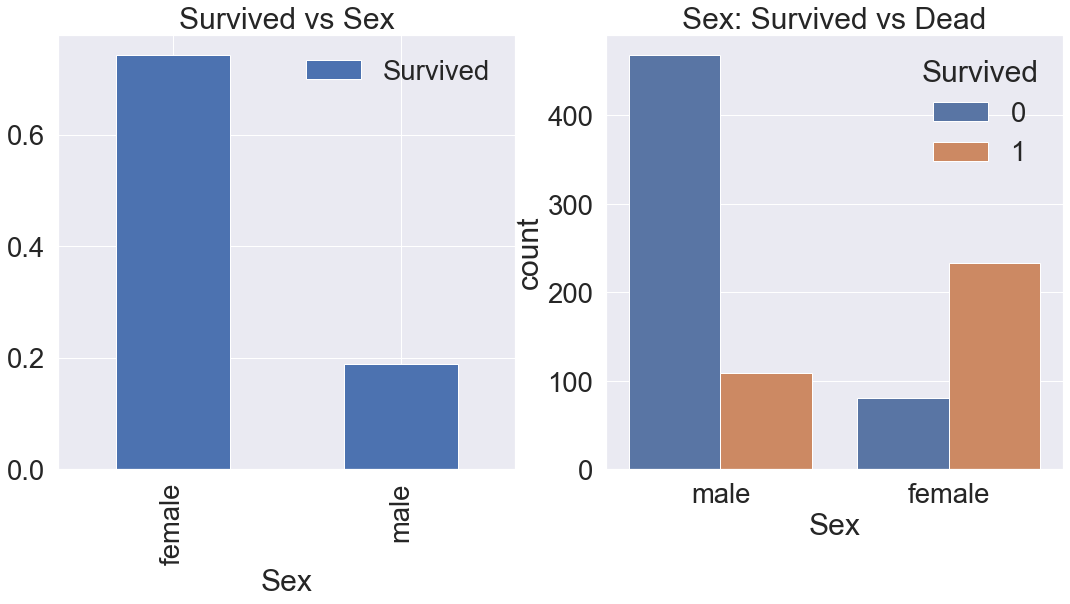

In [95]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train[['Survived','Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])

ax[1].set_title('Sex: Survived vs Dead')

plt.show()


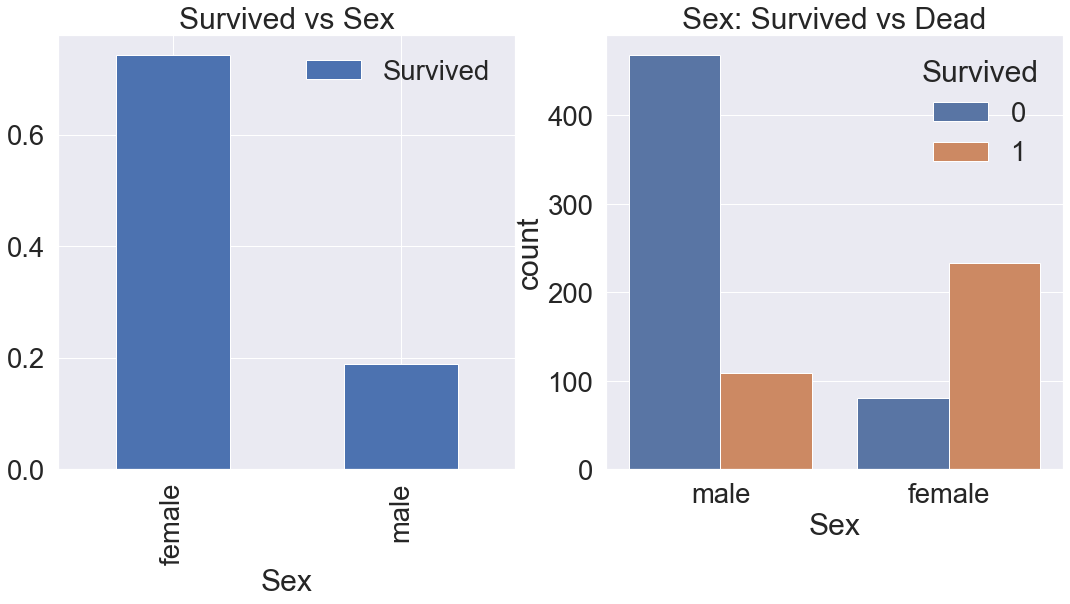

In [96]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [99]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


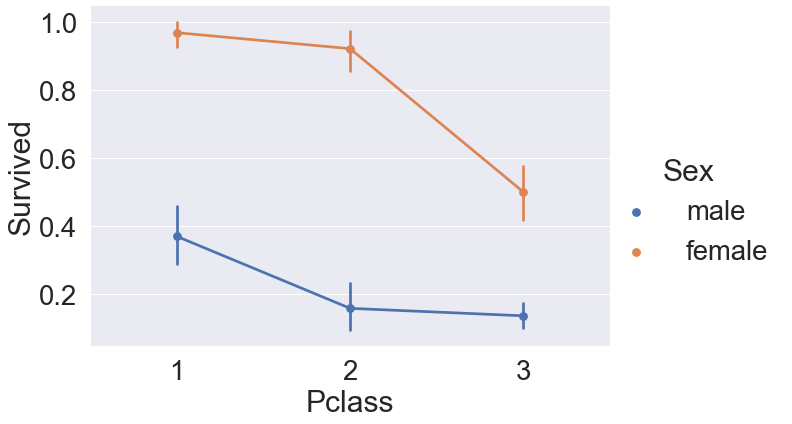

In [100]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

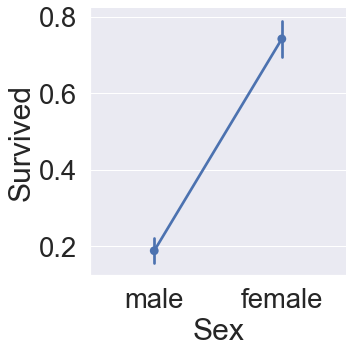

In [105]:
sns.factorplot('Sex','Survived',data=df_train)

In [108]:
print('The Oldest : {}'.format(df_train['Age'].max()))
print('The Youngest : {}'.format(df_train['Age'].min()))
print('The Avg : {:.1f}'.format(df_train['Age'].mean()))

The Oldest : 80.0
The Youngest : 0.42
The Avg : 29.7


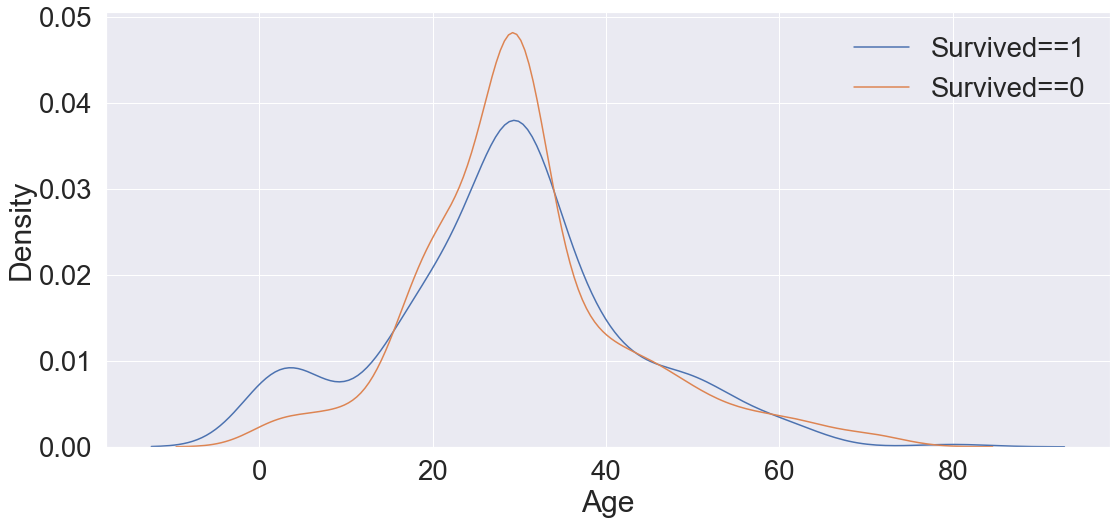

In [110]:
fig, ax=plt.subplots(1,1,figsize=(18,8))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)

plt.legend(['Survived==1','Survived==0'])
plt.show()

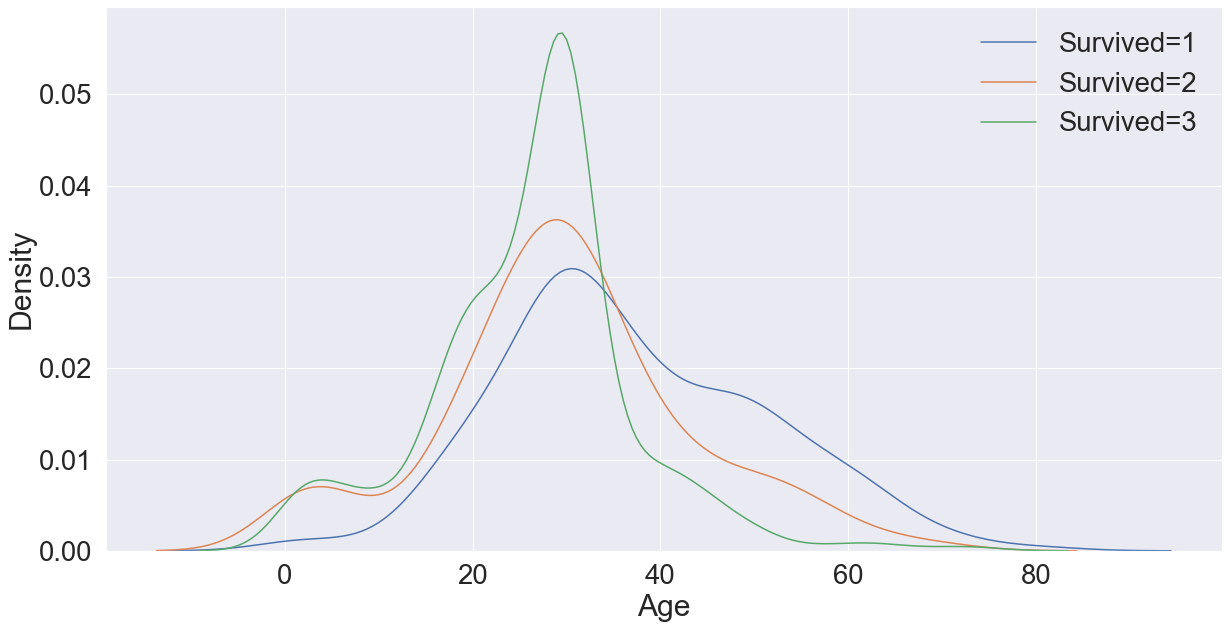

In [111]:
f,ax=plt.subplots(1,1,figsize=(20,10))

sns.kdeplot(df_train[df_train['Pclass']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==2]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==3]['Age'],ax=ax)

plt.legend(['Survived=1','Survived=2','Survived=3'])
plt.show()

In [112]:
cummulate_survival_ratio = []
for i in range(80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i].sum()/len(df_train[df_train['Age']<i['Survived']]))
    

TypeError: 'int' object is not subscriptable